# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number and ID(s)***

---

Name: Ahmed Hassan

ID: 58-0671

Tutorial: 07

---

Name: Ziad Ekramy

ID: 58-6936

Tutorial: 07

## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 160.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/music_genres.csv')
df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


## Data Inspection

In [3]:
df.info() #inspect data types and non null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2972 non-null   object 
 1   acousticness      2972 non-null   float64
 2   danceability      2972 non-null   float64
 3   duration_ms       2972 non-null   float64
 4   energy            2972 non-null   float64
 5   instrumentalness  2972 non-null   float64
 6   liveness          2972 non-null   float64
 7   loudness          2972 non-null   float64
 8   speechiness       2972 non-null   float64
 9   tempo             2972 non-null   float64
 10  valence           2972 non-null   float64
 11  popularity        2972 non-null   float64
 12  key               2972 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 302.0+ KB


In [4]:
df.shape #we have 2,972 rows and 13 columns, according to the output of this and df.info(), we do not have nulls

(2972, 13)

In [5]:
df.describe() #statistical analysis for numeric columns

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2972.000000,2972.000000,2.972000e+03,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000
mean,0.401157,0.537190,2.517272e+05,0.561190,0.211368,0.192791,-10.509249,0.083580,119.020796,0.492741,39.925598,5.938425
std,0.319781,0.150693,9.467215e+04,0.234511,0.267374,0.092370,5.370006,0.080495,17.471762,0.201853,16.747890,3.368621
min,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,0.119036,0.441169,2.063674e+05,0.395030,0.004829,0.137682,-12.428814,0.044900,109.191107,0.348558,32.531911,3.000000
50%,0.321706,0.546511,2.375479e+05,0.601264,0.080663,0.178752,-9.219409,0.059432,119.199333,0.499936,43.059365,7.000000
75%,0.674088,0.647536,2.773008e+05,0.730202,0.343333,0.220858,-6.919969,0.091000,127.510813,0.640380,51.139881,9.000000
max,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


<Figure size 1500x1200 with 0 Axes>

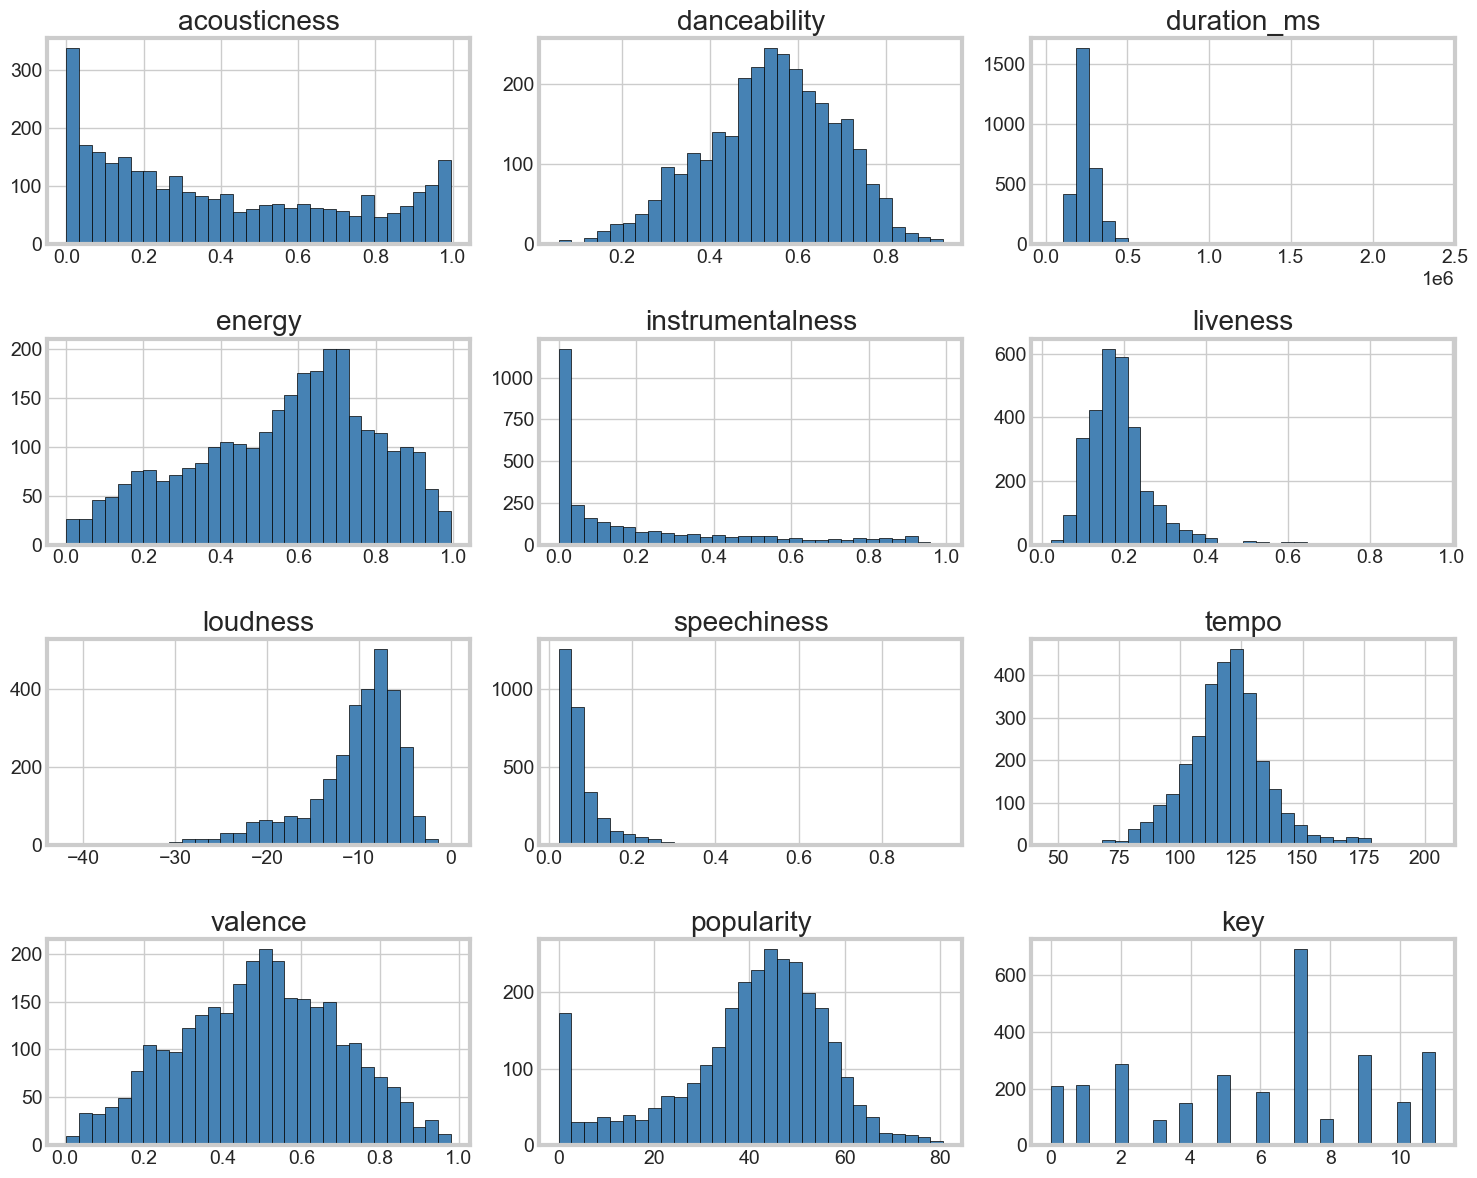

In [6]:
plt.figure(figsize=(15, 12))

df.hist(bins=30, figsize=(15, 12), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()  
#we want to vizualize feature distribution

Many features are skewed. We will need to scale and remove outliers. 

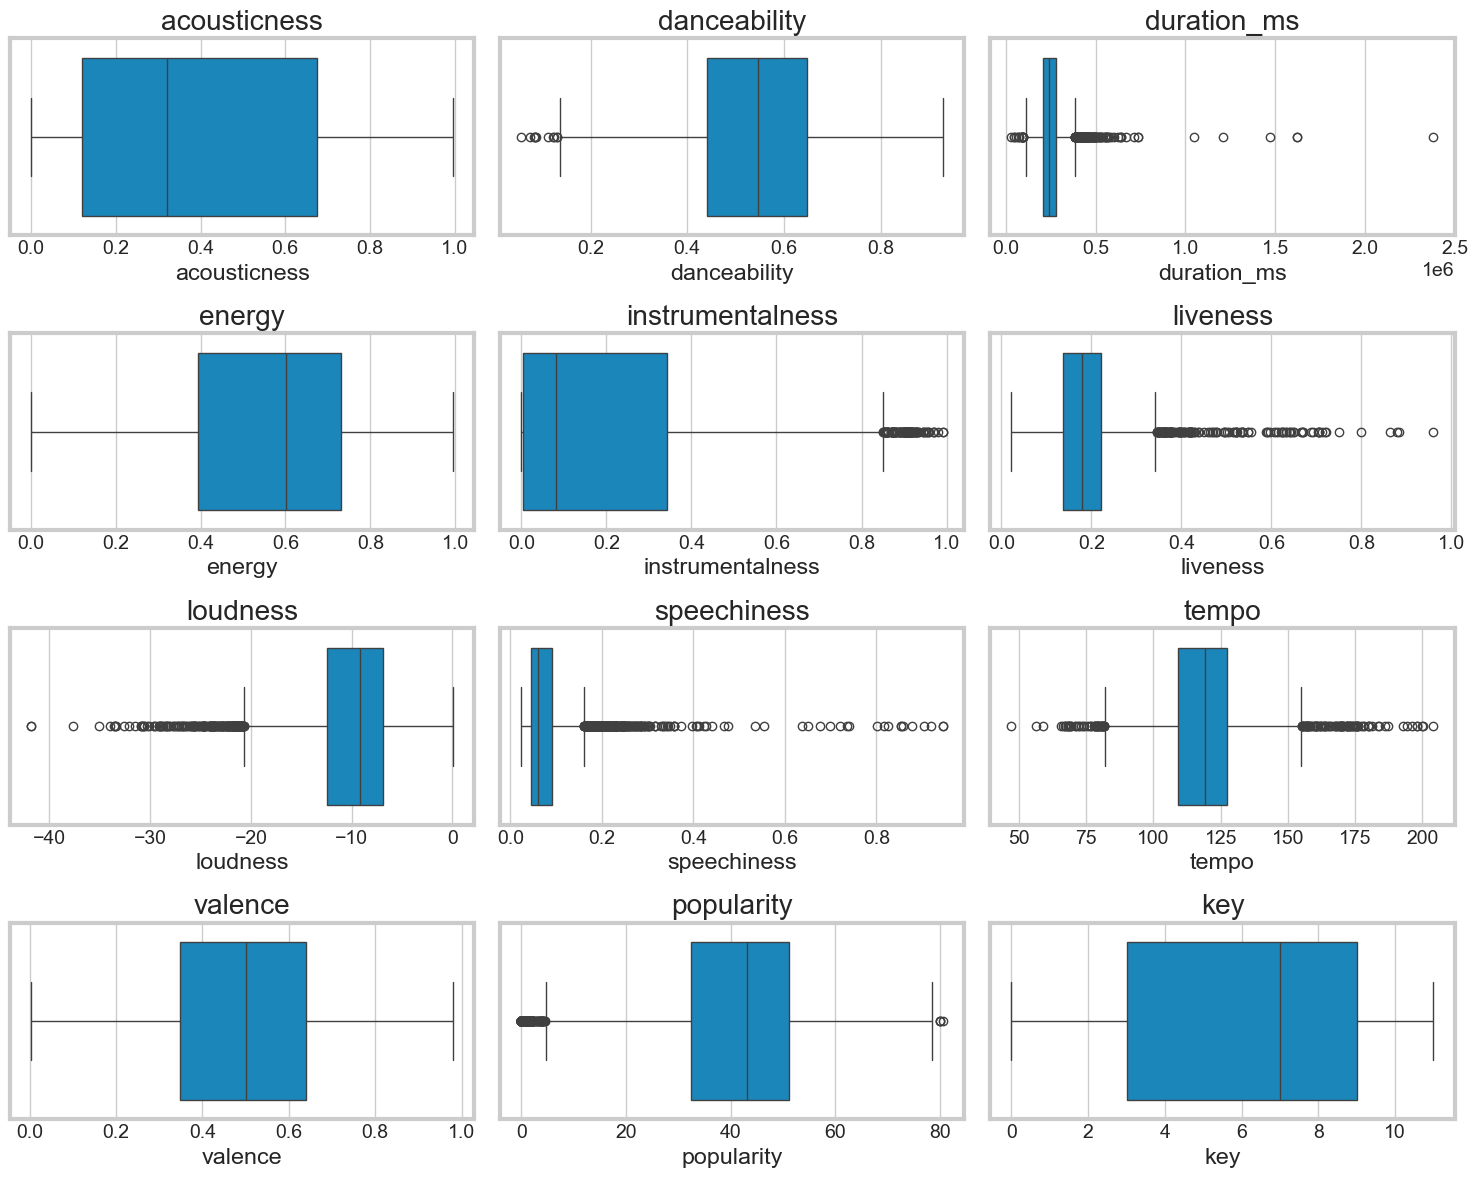

In [7]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()
#we are checking for outliers here

Several features show heavy outliers: 1) instrumentalness 2) speechiness 3) duration_ms 4) tempo 5) loudness 6) liveness 7) Popularity 8) danceability

We will treat the following features: 1) duration_ms 2) instrumentalness 3) speechiness 4) tempo 5) loudness because these features have huge right tails or many unrealistic extreme values.

The other features are naturally skewed because real music data is skewed, so the outliers are not harmful.

## Data Cleaning

In [8]:
df_clean = df.copy() #we copied the data frame to preserve data

In [9]:
outlier_cols = ['duration_ms', 'instrumentalness', 'speechiness', 'tempo', 'loudness']

for col in outlier_cols:
    lower = df_clean[col].quantile(0.01)
    upper = df_clean[col].quantile(0.99)
    df_clean[col] = np.clip(df_clean[col], lower, upper)

#we first grouped the numerical columns we want to remove the outliers for, then we perfromed winsorization to remove the outliers. 

To remove outliers, we applied percentile clipping at the 1st and 99th percentiles for the features containing extreme values. These thresholds were chosen because 1) the dataset is relatively large, so we were able to remove outliers without removing meaningful musical data 2) the boxplots revealed extreme long-tail distributions with a few values far outside the normal range 3) K-Means is highly sensitive to extreme values

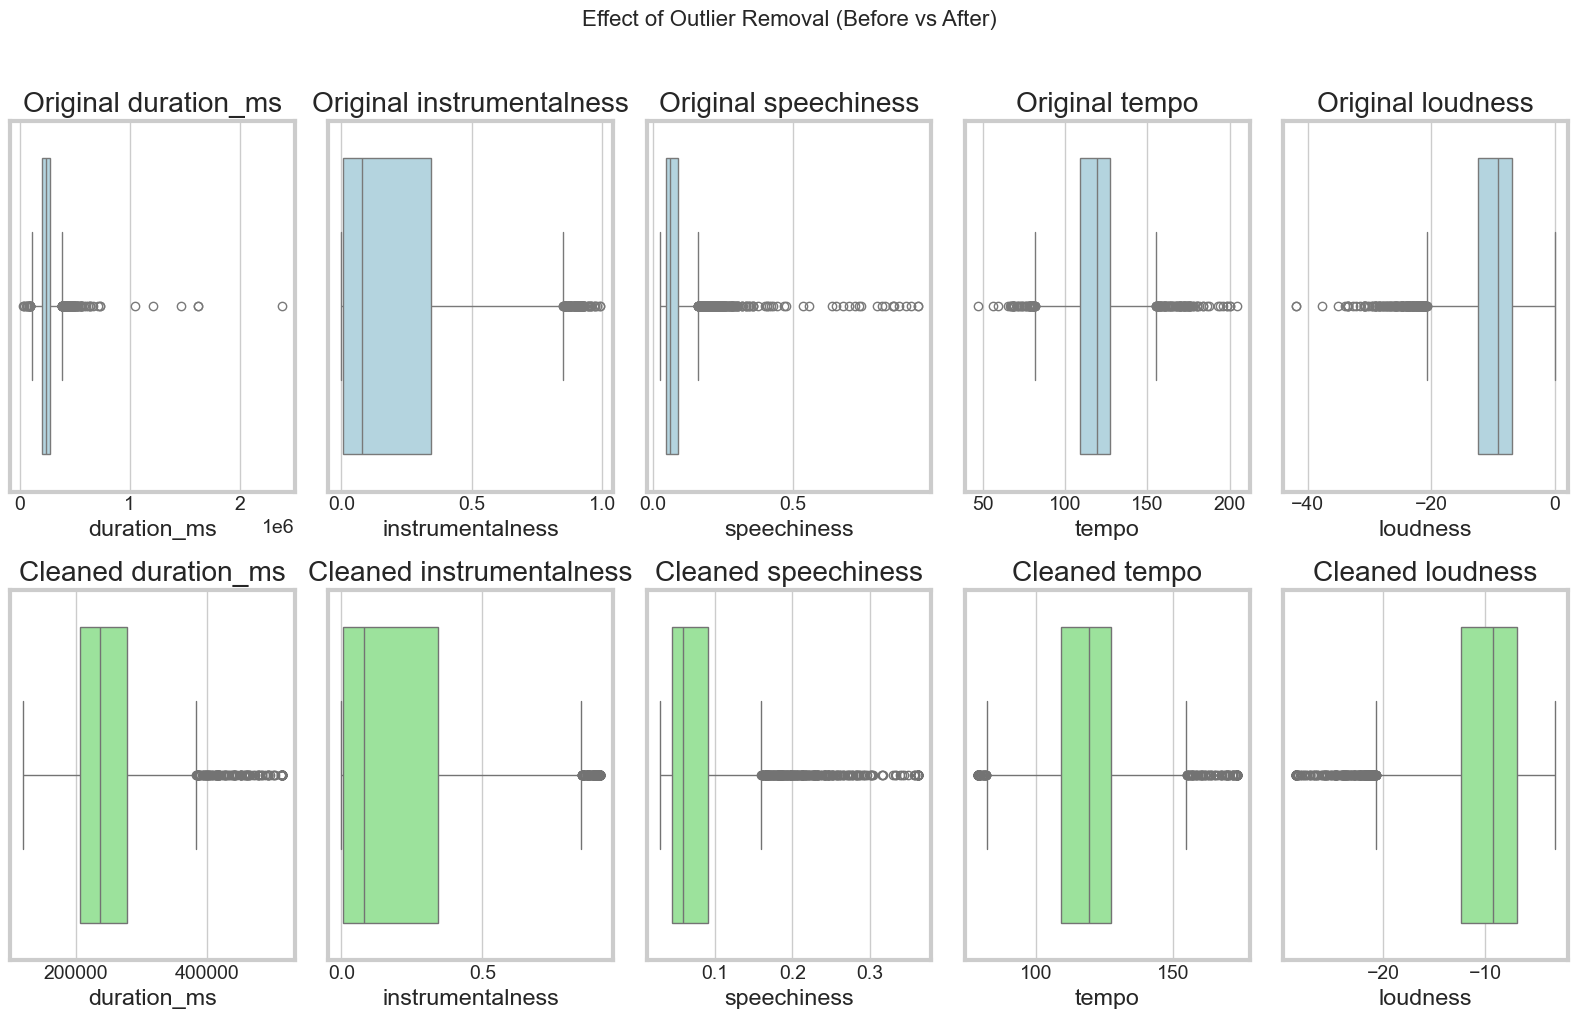

In [10]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 5, i)  # row 1 = original
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Original {col}")
    
    plt.subplot(2, 5, i + 5)  # row 2 = cleaned
    sns.boxplot(x=df_clean[col], color='lightgreen')
    plt.title(f"Cleaned {col}")

plt.suptitle("Effect of Outlier Removal (Before vs After)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

This visualization shows before and after removing the outliers, some were kept. For more explanation on how many values were eexactly clipped, view the markdown cell below block [11]

In [11]:
print("Clipped Values per Column:\n")
for col in outlier_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    
    n_lower = (df[col] < lower).sum()
    n_upper = (df[col] > upper).sum()
    
    print(f"{col}: clipped below={n_lower}, clipped above={n_upper}")

# Show before/after mean & std
print("\nBefore vs After Winsorization (Mean & Std):\n")
comparison = pd.concat([
    df[outlier_cols].agg(['mean','std']).T,
    df_clean[outlier_cols].agg(['mean','std']).T
], axis=1)
comparison.columns = ['mean_before','std_before','mean_after','std_after']
print(comparison.round(3))

Clipped Values per Column:

duration_ms: clipped below=30, clipped above=30
instrumentalness: clipped below=0, clipped above=30
speechiness: clipped below=25, clipped above=30
tempo: clipped below=30, clipped above=30
loudness: clipped below=30, clipped above=30

Before vs After Winsorization (Mean & Std):

                  mean_before  std_before  mean_after  std_after
duration_ms        251727.194   94672.154  249241.048  69160.105
instrumentalness        0.211       0.267       0.211      0.267
speechiness             0.084       0.080       0.081      0.059
tempo                 119.021      17.472     119.005     16.853
loudness              -10.509       5.370     -10.486      5.216


Effect of Outlier Treatment on our features:

1) The Clipped Values: These show how many outliers were removed. 1) duration_ms: 30 low values and 30 high values clipped 2) instrumentalness: only 30 high-end outliers clipped 3) speechiness: 25 low values and 30 high values clipped 4) tempo: 30 low and 30 high values clipped 5) loudness: 30 low and 30 high values clipped

2) Mean & Standard Deviation:

2.1) duration_ms: Mean decreased slightly (251,727 → 249,241), SD decreased significantly (94,672 → 69,160)

2.2) instrumentalness: Mean and SD unchanged which shows that the removed outliers did not have a high effect.

2.3) speechiness: Mean dropped slightly (0.084 → 0.081), SD dropped (0.080 → 0.059).

2.4) tempo: Mean stayed about the same, SD was reduced (17.47 → 16.85).

2.5) loudness: Mean slightly increased (–10.509 → –10.486), SD decreased (5.37 → 5.21) 

## Exploratory Data Analysis

**Q1: What factors affect the Popularity of the song? (Mention the two biggest factors, with interpretation)**

**Visualization**

In [12]:
numeric_cols = df_clean.select_dtypes(include='number') #select all columns with numeric data type, all of the columns are already numeric 
corr_with_pop = numeric_cols.corr()['popularity'].drop('popularity') #compute correlations with popularity
corr_sorted = corr_with_pop.sort_values(ascending=True)

In [13]:
# compute top-2 numeric feature predictors of popularity 
num_cols = df_clean.select_dtypes(include=['float64','int64']).copy()
if 'cluster' in num_cols.columns:
    num_cols = num_cols.drop(columns=['cluster'])

corr_with_pop = num_cols.corr()['popularity'].drop('popularity')
corr_sorted = corr_with_pop.reindex(corr_with_pop.abs().sort_values(ascending=False).index)

print("Correlations with Popularity (sorted by absolute magnitude):\n")
print(corr_sorted.round(3))

# Top-2 features (excluding derived columns like 'cluster')
top2 = corr_sorted.head(2)
print("\nTop 2 *feature* predictors of popularity:\n")
for feat, val in top2.items():
    direction = 'positive' if val>0 else 'negative'
    print(f"- {feat}: corr = {val:.3f} ({direction}).")


#this code was generated to show a list of features correlated to popularity in descending order    

Correlations with Popularity (sorted by absolute magnitude):

acousticness       -0.459
loudness            0.359
energy              0.338
instrumentalness   -0.267
danceability        0.218
tempo               0.156
liveness           -0.094
duration_ms        -0.064
valence             0.023
speechiness         0.019
key                 0.009
Name: popularity, dtype: float64

Top 2 *feature* predictors of popularity:

- acousticness: corr = -0.459 (negative).
- loudness: corr = 0.359 (positive).


Based on the ranked correlations above, the two strongest predictors of popularity are: acousticness & loudness 

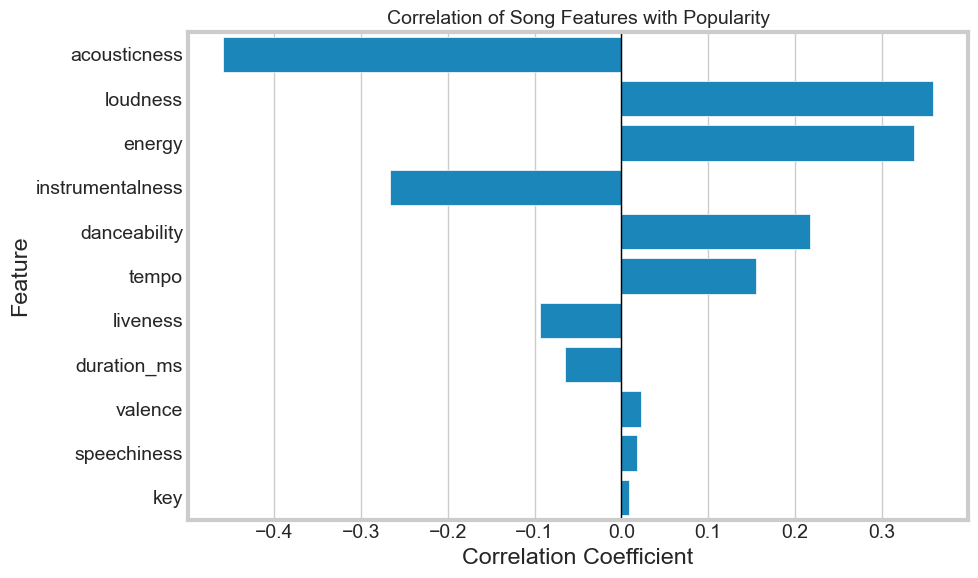

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sorted.values, y=corr_sorted.index)
plt.title('Correlation of Song Features with Popularity', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

#we used a barplot to make it visualy easier for us to see which feature has the best correlation.

**Answer for Q1:** Acousticness and loudness have the two highest corelation with popularity. Acousticness's correlation value is -0.459; that means that it has a strong negative relationship with popularity. As a song gets more popular, it has a less acousticness value. On the other hand, loudness's correlation value is 0.359; that means that it has a strong positive relationship with popularity. As a song gets more popular, it has a higher loudness value.  

**Q2: Which genre is the most popular and which is the least?**

In [15]:
genre_popularity = df_clean.groupby('genres')['popularity'].mean().sort_values(ascending=False) #group by genre and compute mean popularity


print("Top 5 most popular genres:\n", genre_popularity.head())
print("\nBottom 5 least popular genres:\n", genre_popularity.tail()) #display top 5 and bottom 5

Top 5 most popular genres:
 genres
basshall               80.666667
trap venezolano        80.000000
south african house    80.000000
turkish edm            80.000000
alberta hip hop        78.500000
Name: popularity, dtype: float64

Bottom 5 least popular genres:
 genres
cameroonian pop           0.0
minimal melodic techno    0.0
modern swing              0.0
middle east hip hop       0.0
zambian pop               0.0
Name: popularity, dtype: float64


**Visualization**

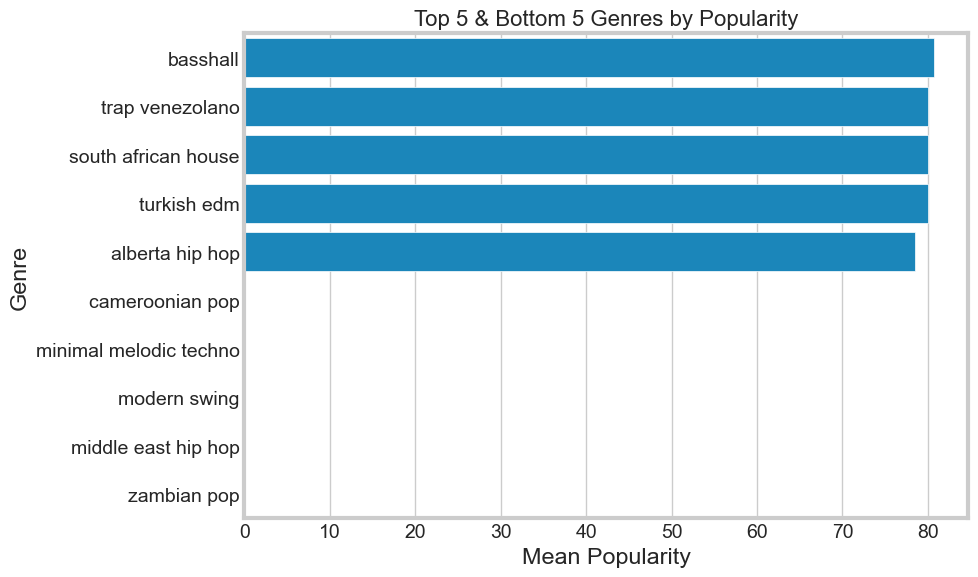

In [16]:
top5 = genre_popularity.head(5)
bottom5 = genre_popularity.tail(5)
combined = pd.concat([top5, bottom5])

plt.figure(figsize=(10, 6))
sns.barplot(
    x=combined.values,
    y=combined.index,
)

plt.title("Top 5 & Bottom 5 Genres by Popularity", fontsize=16)
plt.xlabel("Mean Popularity")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

#we chose a bar chart to show wich genre has the most popularity. We also only put the top 5 and last 5 
#we first extracted them into variables and concatinated them together in the variable combined.

**Answer for Q2:** Based on the visualization and the output above it, here are the top 5 most popular genres: 1) basshall (80.666667) 2) trap venezolano (80) 3) south african house (80) 4) turkish edm (80) 5) alberta hip hop (78.500000). The last 5 genres are 1) cameroonian pop 2) minimal melodic techno 3) modern swing 4) middle east hip hop and 5) zambian pop. All have 0 popularity.   

**Q3: What are the most correlated pairs of attributes? (Mention 2 pairs, with interpretation)**

**Visualization**

In [17]:
# Get top correlated feature pairs (excluding self-correlation)
corr_matrix = num_cols.corr().abs()

# Upper triangle only
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Sort pairs
top_pairs = upper.stack().sort_values(ascending=False)

print("Top 5 most correlated pairs:\n")
print(top_pairs.head(5))

#this code shows the top 5 correlated variables

Top 5 most correlated pairs:

acousticness      energy      0.868257
energy            loudness    0.856564
acousticness      loudness    0.746578
danceability      valence     0.652549
instrumentalness  loudness    0.537416
dtype: float64


From the table above, the top 2 correlated pairs are: Energy & Acousticness, stong negative (-0.86) and Energy & Loudness strong positive (0.85)

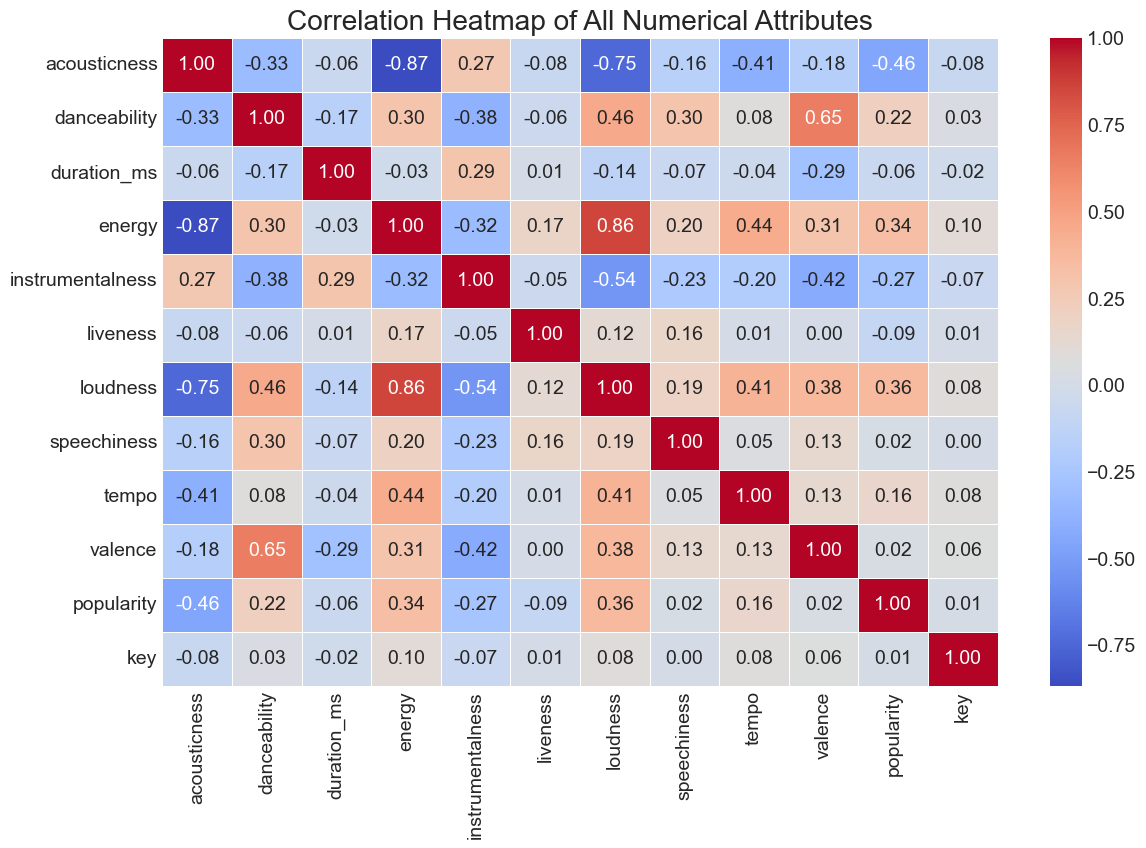

In [18]:
corr_matrix = df_clean.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".2f")
plt.title("Correlation Heatmap of All Numerical Attributes")
plt.show()
#the heatmap is the best figure to show correlation between attributes

**Answer for Q3:** The most correlated pairs are 1) Energy & Acousticness (-0.868257) 2) Energy & Loudness (0.856564). 

- Energy & Acousticness have an inverse relationship. As a track becomes more energetic, it is very likely to be less acoustic.

- Energy & Loudness move together. As a track's energy score increases, its loudness always increases as well.

**Q4: Plot the frequency of words in genres. Which main genre categories have the most sub-genres? (mention at
 least 3)**

**Visualization**

In [19]:
import re
from collections import Counter

In [20]:
main_cats = [
    'pop','rock','metal','jazz','classical','hip hop','hiphop','rap',
    'electronic','edm','dance','folk','blues','country','reggae' 
] #define main genre categories


genre_lower = df_clean['genres'].str.lower()

main_counts = {}
for cat in main_cats:
    main_counts[cat] = genre_lower.str.contains(cat).sum()

main_counts = pd.Series(main_counts).sort_values(ascending=False)

print("Main Genre Category Counts:\n")
print(main_counts)

Main Genre Category Counts:

pop           298
rock          213
metal         148
classical     108
jazz          100
hip hop       100
folk           96
rap            95
blues          38
country        33
dance          31
reggae         27
electronic     25
edm            15
hiphop          0
dtype: int64


The main genre categories with the most sub-genres are pop, rock and metal

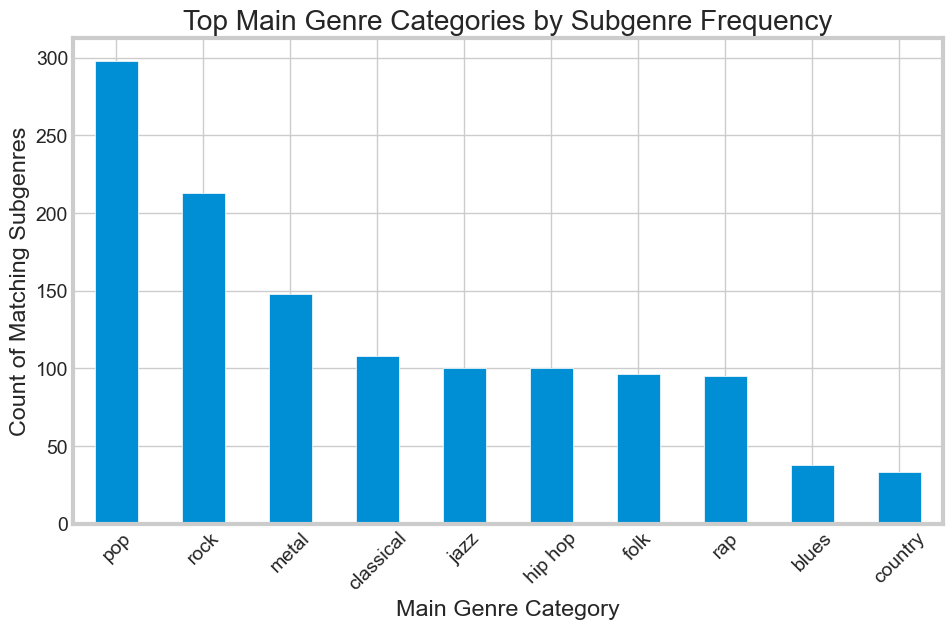

In [21]:
plt.figure(figsize=(10,6))
main_counts.head(10).plot(kind='bar')
plt.title("Top Main Genre Categories by Subgenre Frequency")
plt.xlabel("Main Genre Category")
plt.ylabel("Count of Matching Subgenres")
plt.xticks(rotation=45)
plt.show()
#we used a bar chart because it is easy to identify the highest values

**Answer for Q4:** The genre that has the most sub genres are pop (298), rock (213), and metal (148).

**Q5: Create an additional visualization that differs from earlier ones. Your visualization must highlight a new data
 relationship or finding. Provide a short explanation of the insight and its relevance.**

#### Relationship Between Energy & Danceability: This shows how energetic songs are also generally more danceable

**Visualization**

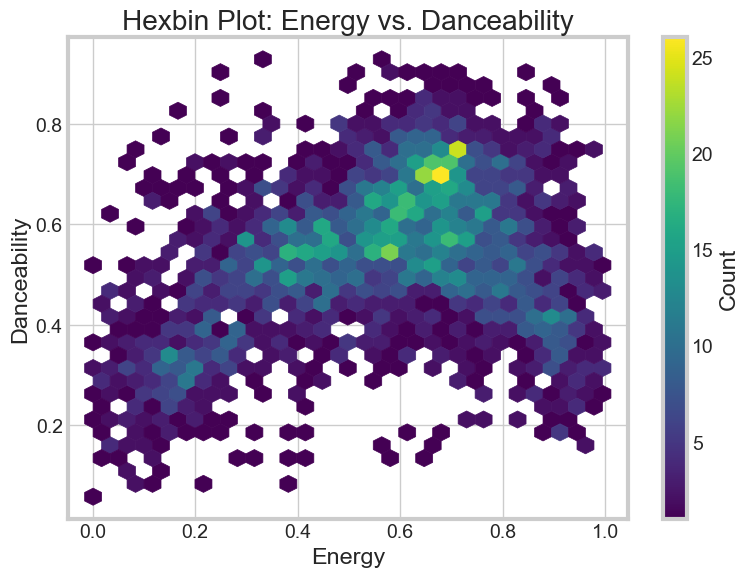

In [22]:
plt.figure(figsize=(8,6))
plt.hexbin(df_clean['energy'], df_clean['danceability'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title("Hexbin Plot: Energy vs. Danceability")
plt.tight_layout()
plt.show()

**Answer for Q5:** There is a general visible correlation where as Energy increases, Danceability tends to increase. The most common type of song in this dataset is highly energetic and danceable. The dark spots represent a smaller subset of tracks that are acoustic, ambient, or have low energy and not particularly meant for dancing.

## Data Preparation for Modeling

#### Justification for feature selection:
K-Means relies on numerical distance, so including irrelevant or weakly related features can distort the clusters. We selected the following five features for clustering: 1) tempo 2) energy 3) acousticness 4) danceability 5) instrumentalness. We selected them because: 
1) They capture core musical characteristics and avoid noise.
2) They have the highest variance and contribute strongly to genre separation.
3) They are also not redundant.

In [23]:
from sklearn.preprocessing import StandardScaler #we imported the scaling library we will use, Standard Scaler

In [24]:
cluster_features = ['tempo', 'energy', 'acousticness', 'danceability', 'instrumentalness']  #these are the features we want to scale

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[cluster_features])
df_scaled = pd.DataFrame(df_scaled, columns=cluster_features)
#we then performed scaling to the cluster_features variable

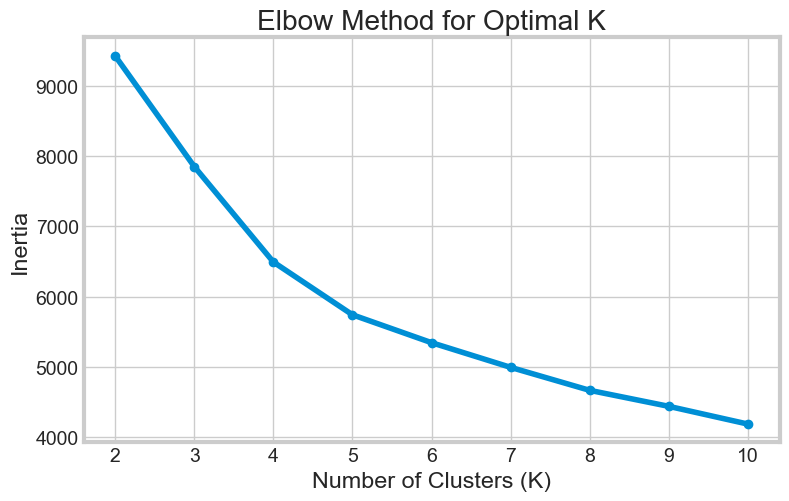

In [26]:
from sklearn.cluster import KMeans
inertia = []

K_range = range(2, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

#we will now use the elbow method to check for the best number of clusters to use

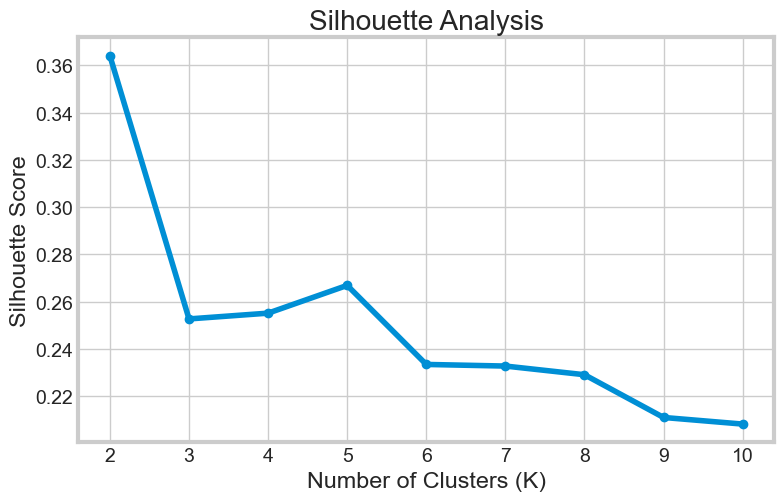

[0.3640013689982364,
 0.25265428273710105,
 0.25509541250351736,
 0.266847516875615,
 0.23338290517254953,
 0.2326988760975635,
 0.22903010157712622,
 0.21093691076167242,
 0.2081352833204142]

In [27]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

sil_scores
# We then check the silhouette score to see how well separated the clusters are for each K

Based on the Elbow Method and Silhouette Score, the best choice for K is 2. In the Elbow Method, There is a big drop from K = 2 and K = 4. After K = 4, the reduction becomes smaller. However, the Silhouette Score shows that K = 2 has the best score, 0.364. 

In Conclusion, even though the elbow curve continues decreasing, the cluster quality is much worse after K=2.

## Modeling

### K-Mean Fitting

In [28]:
from sklearn.decomposition import PCA
K = 2
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=20, max_iter=300, random_state=42)

# K is equal to 2 as we explained above. 

Parameter Values used:
1)  init = 'k-means++' is to speed convergence
2)  n_init = 20 to increase stability
3)  max_iter = 300, this is the maximum number of repititions done, to prevent premature convergence
4)  random_state = 42 gives reproducible results.

So on top of the Parameters used in the Modeling Section, we also used the Elbow Method & the Silhouette Score in the Data Preparation for Modeling section. 

In conclusion, we identified all the Parameters used, init = 'k-means++', n_init = 20, max_iter = 300, random_state and all the methods Elbow Method & Silhouette Score while also justifying their use.   

In [29]:
kmeans_labels = kmeans.fit_predict(df_scaled) 
df_clean['cluster'] = kmeans_labels

In [30]:
print("Cluster counts:\n", df_clean['cluster'].value_counts()) #count objects in clusters

Cluster counts:
 cluster
0    2059
1     913
Name: count, dtype: int64


We divied the objects into clusters 0 & 1. Cluster 0 has 2059 objects while Cluster 1 has 913 objects.

### Random Sample of at least 5 genres per Cluster

In [31]:
print("\nRandom sample of 5 genres from each cluster:")
for c in sorted(df_clean['cluster'].unique()):
    sample = df_clean[df_clean['cluster'] == c]['genres'].sample(n=5, random_state=42).tolist()
    print(f"\nCluster {c} (5 random genres):")
    for g in sample:
        print(" -", g)


Random sample of 5 genres from each cluster:

Cluster 0 (5 random genres):
 - new jersey indie
 - disco
 - ninja
 - kizomba antigas
 - alaska indie

Cluster 1 (5 random genres):
 - greek swing
 - ukrainian classical
 - funk 150 bpm
 - galante era
 - german jazz


### Visualize Clusters

In [32]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled)

df_plot = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'cluster': kmeans_labels,
    'genres': df_clean['genres'].values
})

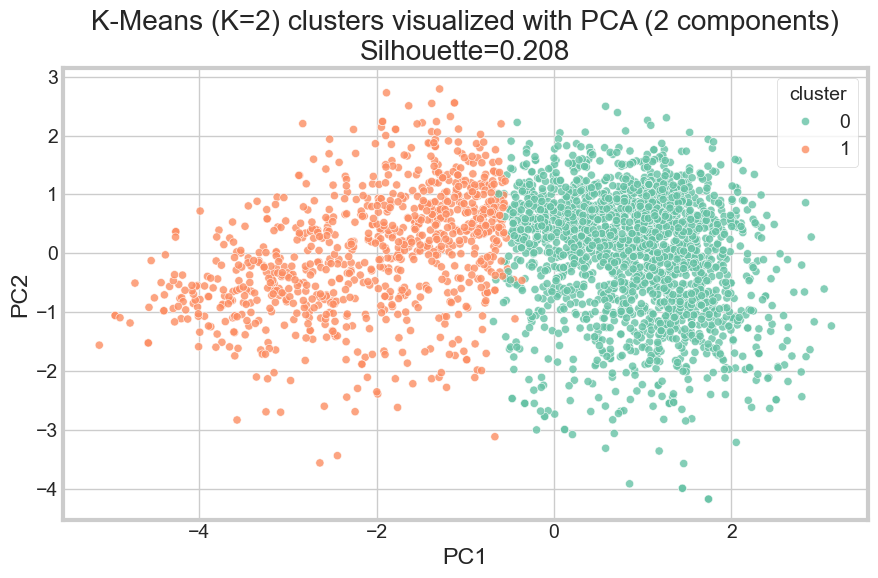

In [33]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='cluster', palette='Set2', s=35, alpha=0.8)
plt.title(f'K-Means (K={K}) clusters visualized with PCA (2 components)\nSilhouette={sil:.3f}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='cluster')
plt.tight_layout()
plt.show()

#### Understanding the PCA Scatter Plot
This graph helps visualize high dimensional data (5 features) on a 2D flat surface. 

- The PC1 axis represents the primary difference between the songs. Cluster 0 is on the right side where its values are greater than -0.5. Cluster 1 is on the left side where its values are less than -0.5.

- The PC2 axis shows overlapping on the y axis. This is because PC2 captures variations that both clusters share.

- The area where Cluster 0 and Cluster 1 dots mix indicates "boundary" songs. These might be semi-acoustic pop songs or upbeat jazz tracks that don't fit perfectly into a single category. This overlap explains why the Silhouette score is 0.364 (good, but not completely separated). The main characteristics of the Partitioning technique is that clusters do not overlap and each point belongs to one cluster. 

In [34]:
for c in sorted(df_clean['cluster'].unique()):
    subset = df_clean[df_clean['cluster'] == c]
    top_words = (
        subset['genres']
        .str.lower()
        .str.split()
        .explode()
        .value_counts()
        .head(10)
    )
    print(f"\nTop keywords in Cluster {c}:\n")
    print(top_words)
#we generated this block to extract top genre keywords per cluster


Top keywords in Cluster 0:

genres
indie    203
pop      188
rock     173
metal    131
hip       96
hop       96
punk      65
rap       63
house     50
deep      42
Name: count, dtype: int64

Top keywords in Cluster 1:

genres
classical       104
jazz             70
pop              52
folk             47
piano            40
indie            34
italian          23
contemporary     19
choir            19
classic          17
Name: count, dtype: int64


Using the top keywords and feature means per cluster, we describe groups as: 
- Cluster 0: indie, pop, rock, metal

- Cluster 1: classical, jazz, pop, folk, piano

### Describe Clusters

We'll compute cluster-wise means in both scaled space and original space.

In [35]:
cluster_feature_means_scaled = pd.DataFrame(df_scaled, columns=cluster_features).groupby(df_clean['cluster']).mean()
cluster_feature_counts = df_clean.groupby('cluster').size()

print("\nCluster counts:\n", cluster_feature_counts)
print("\nCluster means (scaled features):\n", cluster_feature_means_scaled.round(3))

try:
    cluster_feature_means_original = pd.DataFrame(scaler.inverse_transform(cluster_feature_means_scaled),
                                                  columns=cluster_features, index=cluster_feature_means_scaled.index)
    print("\nCluster means (original units):\n", cluster_feature_means_original.round(3))
except Exception as e:
    print("\nCould not inverse-transform cluster means (scaler object not found). If you used StandardScaler() as 'scaler', re-run this cell with 'scaler' in scope.")



Cluster counts:
 cluster
0    2059
1     913
dtype: int64

Cluster means (scaled features):
          tempo  energy  acousticness  danceability  instrumentalness
cluster                                                             
0        0.285   0.523        -0.541         0.293            -0.278
1       -0.644  -1.180         1.221        -0.661             0.627

Cluster means (original units):
            tempo  energy  acousticness  danceability  instrumentalness
cluster                                                               
0        123.815   0.684         0.228         0.581             0.137
1        108.159   0.285         0.791         0.438             0.378


<Figure size 1000x500 with 0 Axes>

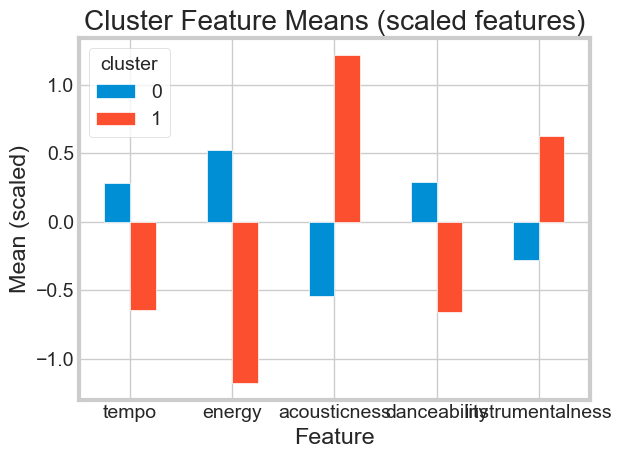

In [36]:
plt.figure(figsize=(10,5))
cluster_feature_means_scaled.T.plot(kind='bar', rot=0)
plt.title('Cluster Feature Means (scaled features)')
plt.xlabel('Feature')
plt.ylabel('Mean (scaled)')
plt.tight_layout()
plt.show()

#this plot shows if the features of the cluster are above or below average, after being standerdized.

#### Understanding the Cluster Feature Means Plot
This graph tells us exactly why the algorithm separated the songs the way it did. Because the features are scaled using StandardScaler, 0.0 is the average for the whole dataset. Bars above 0 are higher than average and bars below 0 are lower than average.

- Cluster 0 is a more modern and energetic cluster. It shows high tempo, energy, and danceability while having lower acousticness and instrumentalness.

- Cluster 1 is more of an atmospheric or acoustic cluster. It has low tempo, energy, and danceability but shows high acousticness and instrumentalness. 

### Cluster Interpretation

Based on the Visualizations and the Describe Clusters sub section, we can interpret the following points: 

- Cluster 0 is the larger group of your dataset, with 2,059 objects. Its feature characteristics are high Tempo (123.8 BPM), high Energy (0.684), high Danceability (0.581), low Acousticness (0.228), and low Instrumentalness (0.137). Genres include: new jersey indie, disco, kizomba antigas, alaska indie. They are commercial and dance friendly genres. In conclusion, this cluster captures modern, high-energy, rhythm-driven music with vocals, typical of pop, disco, indie, dance, and modern global styles.

  
- Cluster 1 is a smaller group, 913 items, but very unique. Its feature characteristics are low Tempo (108.2 BPM), low Energy (0.285), low Danceability (0.438), very high Acousticness (0.791), and higher Instrumentalness (0.378). Genres include: greek swing, ukrainian classical, galante era, german jazz. These align with classical, jazz, folk, and acoustic traditions. In conclusion, this cluster represents acoustic, classical, jazz-influenced, or traditional genres, often instrumental and lower in energy. 

### K-Means Clustering Visualization 

In [37]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels

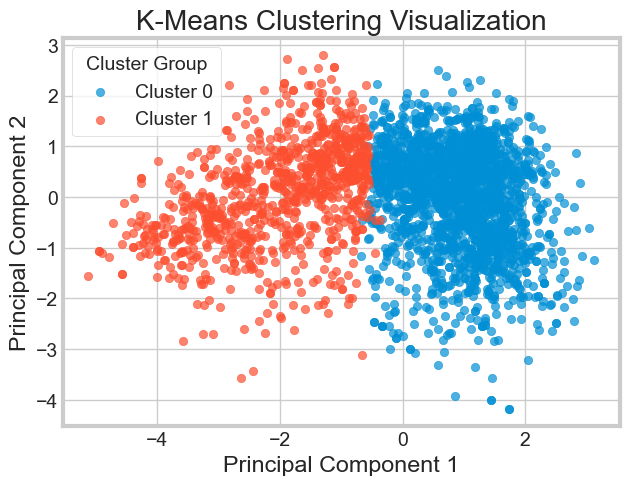

In [38]:
for cluster in [0, 1]:
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        label=f'Cluster {cluster}',
        alpha=0.7
    )

plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster Group")
plt.show()

#### Interpretation of K-Means Visualization
The algorithm had no trouble distinguishing between the two types of music. The features we selected (Energy, Acousticness, Danceability, Tempo, and Instrumentalness) are highly effective discriminators. We can see that there is a strong separation between the clusters; however, there is still some overlapping.

- Cluster 0: This cluster's points are more compact and tight. This group is homogenous. The songs in this cluster follow a very strict type of music, that contains high energy.

- Cluster 1: On the other hand, this cluster is more loose and the points are not compact. This group is diverse. It acts as a "catch-all" for everything that isn't a standard pop song. The variance in this cluster is high.  

## Evaluation

In [39]:
inertia = kmeans.inertia_
sil = silhouette_score(df_scaled, kmeans_labels)
print(f"\nKMeans inertia (WCSS): {inertia:.2f}")
print(f"Silhouette score for K={K}: {sil:.6f}")


KMeans inertia (WCSS): 9422.16
Silhouette score for K=2: 0.363749


In [40]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [41]:
ch = calinski_harabasz_score(df_scaled, kmeans_labels)
print(f"\nCalinski-Harabasz Index: {ch:.3f}")


Calinski-Harabasz Index: 1714.084


In [42]:
db = davies_bouldin_score(df_scaled, kmeans_labels)
print(f"Davies-Bouldin Index: {db:.3f}")

Davies-Bouldin Index: 1.143


### Commenting on Performance + Giving a Final Recommendation

#### Silhouette Score
This score is used to identify the average distance between objects in a cluster, which are Intra Class and the minimum average distance between different clusters, Inter Class. The goal is to maximize Intra Class similarity while minimizing Inter Class similarity. For, K = 2, the silhouette score is about 0.364. This score indicates moderate separation between clusters

#### Calinski-Harabasz Index
The Calinski-Harabasz Index is a metric for evaluating clustering quality, measuring the ratio of between cluster separation. The higher the score is the better. Our score, 1717.4, indicates good separation. 

#### Davies-Bouldin Index
The Davies-Bouldin Index evaluates clustering algorithm performance, measuring the average similarity between clusters, where lower values indicate better clustering. Our score is 1.143, which shows fair compactness and separation

#### Interpretation
The scores show that the dataset naturally forms two broad, meaningful groups, clusters are distinguishable but not perfectly separated, and that K=2 provides the best balance between cohesion & separation. The algorithm has successfully split the dataset into two very distinct musical categories: "Energetic/Electronic" vs. "Acoustic/Atmospheric".

Moreover, the two graphs confirm the same story. According to the bar chart, the most divided characteristics are energy and acousticness. The PCA Plot confirms this by separating the clusters horizontally along that exact axis. 

#### Final Recommendation
Based on the Silhouette, CH, and DB scores, K=2 is an appropriate and justifiable choice for this dataset. The clusters are meaningful and interpretable, capturing two different musical groups: high energy modern genres and low energy acoustic styles. The model provides fair scores based on the evaluation metrics used.

However, since the clusters overlap, shown in the PCA scatterplot, we believe that K-Means clustering might not be the best option. We recommend trying a density based method such as the DBSCAN algorithm to get a more accurate result.